In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data_file=pd.read_csv('Mall_Customers.csv')

In [3]:
data_file.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data_file.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


if the data is labled it supervised
if the data is unlabled it is unsupervised

our data is unsupervised

here after i use k-means algorithm for the dataset👇👇

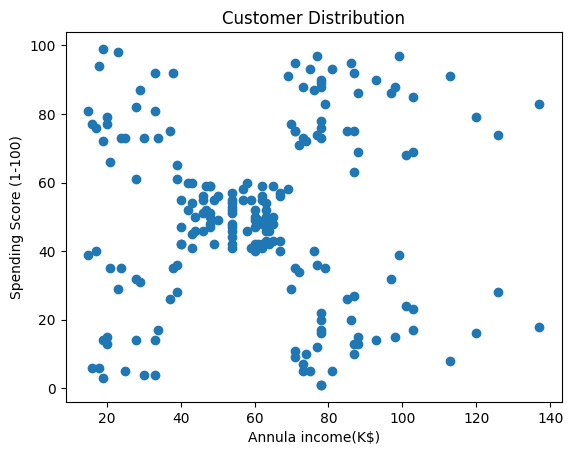

In [6]:
#using k means
plt.scatter(data_file['Annual Income (k$)'],data_file['Spending Score (1-100)'])
plt.xlabel('Annula income(K$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

there are 5 grps have been grouped by k means 

in annual income and spending score both have large and small values. in ml models have mostly give priority for highest values so we have standardize the both columns👇👇

In [7]:
x=data_file[['Annual Income (k$)','Spending Score (1-100)']]
scalar=StandardScaler()
scaled=scalar.fit_transform(x)

In [8]:
data_file.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

we have one method named "L-bow method" it is used find clusters count👇👇

wccs Value [400.0, 273.66888662642015, 157.70400815035947, 109.22822707921347, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.319122878338824, 32.49508119910091, 30.05932269404221]


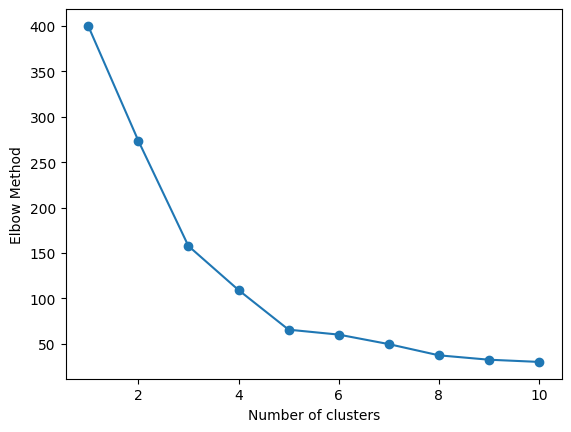

In [10]:
wccs=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled)
    wccs.append(kmeans.inertia_)

print("wccs Value",wccs)
plt.plot(range(1,11),wccs,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow Method')
plt.show()

we had add a new column that denote whcih data have grouped in which cluster grp👇👇

In [11]:
kmeans=KMeans(n_clusters=5, random_state=42)
data_file['cluster_grp']=kmeans.fit_predict(scaled)

data_file.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_grp
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [12]:
data_file.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster_grp'],
      dtype='object')

plot a grph by cluster group👇👇

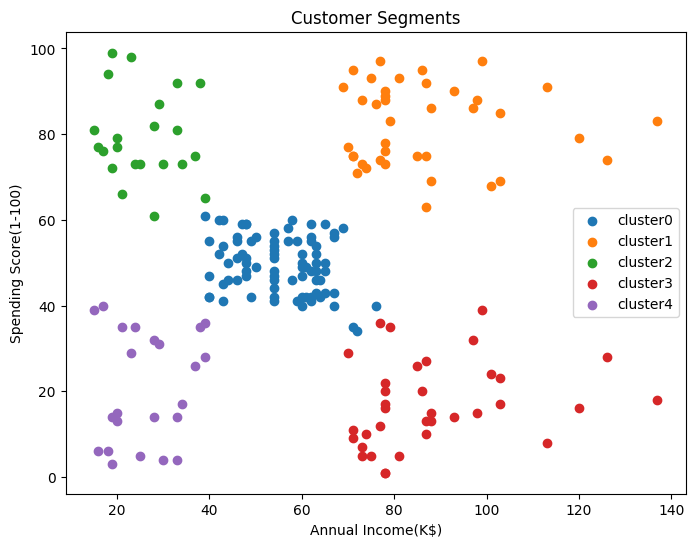

In [13]:
plt.figure(figsize=(8,6))
for cluster in range(5):
    plt.scatter(
        data_file[data_file['cluster_grp']==cluster]['Annual Income (k$)'],
        data_file[data_file['cluster_grp']==cluster]['Spending Score (1-100)'],
        label=f'cluster{cluster}'
    )

plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

we want to save our model so use joblib👇👇


in future any user put inputs for the model like normal integes but we change into scalar value, by we save this it may useful for user and covert values to scaler value

In [14]:
import joblib

joblib.dump(scalar,"scalar.pkl")
joblib.dump(kmeans,"kmeans_model.pkl")

['kmeans_model.pkl']

In [15]:
data_file.head(200)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_grp
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3
